In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder as OE
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

In [2]:
d = "C:\kaggle_data\credit_card"

In [3]:
lst = os.listdir(d)
print(lst)

['.ipynb_checkpoints', 'sample_submission.csv', 'test.csv', 'train.csv', 'Untitled.ipynb']


In [18]:
df =pd.DataFrame([[0,0,0],[0,0,0],[0,0,1],[0,0,2]])

In [22]:
df

,0,1,2
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,2


In [24]:
df[df.duplicated()==False]

,0,1,2
0,0,0,0
2,0,0,1
3,0,0,2


In [4]:
train = pd.read_csv(d + '\\' +lst[3])
test = pd.read_csv(d + '\\' +lst[2])
ss = pd.read_csv(d + '\\' +lst[1])

In [5]:
train['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(train['gender'],train['income_total'],train['income_type'],train['DAYS_BIRTH'],train['DAYS_EMPLOYED'])]
test['identity'] = [str(i) + str(j) + str(k) + str(l) + str(m) for i,j,k,l,m in zip(test['gender'],test['income_total'],test['income_type'],test['DAYS_BIRTH'],test['DAYS_EMPLOYED'])]

In [6]:
# Married, Civil marriage
train['income_per_size'] = np.log(train['income_total']/train['family_size'])
test['income_per_size'] = np.log(test['income_total']/test['family_size'])
train.loc[(train['family_type']=='Married')|(train['family_type']=='Civil marriage'),'income_per_size']\
= train['income_per_size'] * 2

test.loc[(test['family_type']=='Married')|(test['family_type']=='Civil marriage'),'income_per_size']\
= test['income_per_size'] * 2

In [8]:
train[train['identity'].duplicated()==False].to_csv('no_dup+ips.csv',index=False)

In [30]:
len(train[train['identity'].duplicated()==False].identity.value_counts())

8727

In [33]:
train[train['identity'].duplicated()==False]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,identity
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,F202500.0Commercial associate-13899-4709
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,F247500.0Commercial associate-11380-1540
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,M450000.0Working-19087-4434
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,F202500.0Commercial associate-15088-2092
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,F157500.0State servant-15037-2105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,26450,F,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-581,1,0,1,0,Laborers,1.0,-37.0,2.0,F225000.0Commercial associate-10338-581
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,...,-2475,1,0,0,0,NaN,2.0,-47.0,2.0,F180000.0Working-15291-2475
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0,F292500.0Working-10082-2015
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,-107,1,0,0,0,Laborers,1.0,-59.0,2.0,M171000.0Working-10145-107


# 개요
## target 변수
- credit: 타겟변수, 
    [0, 1, 2]

## 설명 변수
- gender: 성별 [M, F]
- car : 차량 소유 여부 [Y, N]
- reality: 부동산 소유 여부 [Y, N]
- FLAG_MOBIL: 핸드폰 소유 여부, T/F, [1]
- work_phone: 업무용 전화 소유 여부, T/F, [0,1]
- phone : 전화 소유 여부, T/F, [0,1]
- email : 이메일 소유 여부, T/F, [0,1]  
    
    
    
- child_num: 자녀 수, int
    [인트형]
    
- family_size: 가족 규모, int,

- income_total : 연간 소득, int


- DAYS_BIRTH : 출생일, 데이터 수집일이 0이고 역으로 계산, int
- DAYS_EMPLOYED: 업무 시작일, 데이터 수집일이 0이고 역으로 계산, int
- begin_month : 신용카드 발급 월, 수집 당시 0 역으로 계산,int형


- occyp_type : 직업 유형, categorical,  [nan, 'Laborers', 'Managers', 'Sales staff', 'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff','Accountants', 'Realty agents', 'Security staff', 'Cleaning staff','Private service staff', 'Cooking staff', 'Secretaries','HR staff', 'IT staff', 'Low-skill Laborers','Waiters/barmen staff']
- income_type : 소득 분류, categorical
    ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type : 교육 수준, , categorical
    ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type : 결혼 여부, categorical
    ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식, categorical
    ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

## 처음에 드는 생각 정리
### 드랍할 것
- FLAG_MOBIL은 어차피 다 1이니까 drop

### 이진 변수
- gender, car, reality, work_phone, phone, email

### int, 연속형 변수
- child_num, family_size, income_total

### 카테고리컬
- occyp_type, income_type, edu_type, family_type, house_type

#### 특이사항
- occyp_type: null 값 있음

In [7]:
display(train.head(),test.head())

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [8]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [9]:
total = pd.concat([train, test])

In [10]:
total['begin_month'].unique()

array([ -6.,  -5., -22., -37., -26., -18., -41., -53., -38., -40., -51.,
       -60.,  -2., -14.,  -7., -35.,  -4., -13., -57., -47., -33., -30.,
       -20.,  -8., -39., -21., -19., -24., -48., -12., -10., -42., -29.,
        -3., -23., -25.,  -1., -15., -32., -59., -54., -34.,   0., -27.,
       -45., -56., -46.,  -9., -44., -36., -43., -49., -11., -55., -58.,
       -28., -52., -17., -50., -16., -31.])

In [11]:
total['occyp_type'].value_counts().keys()

Index(['Laborers', 'Core staff', 'Sales staff', 'Managers', 'Drivers',
       'High skill tech staff', 'Accountants', 'Medicine staff',
       'Cooking staff', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff',
       'Secretaries', 'HR staff', 'Realty agents', 'IT staff'],
      dtype='object')

In [12]:
total.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [13]:
len(test)

10000

# label encoding
- gender, car, reality, work_phone, phone, email, occyp_type, income_type, edu_type, family_size, house_type

In [14]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [15]:

labels = ['gender', 'car', 'reality', 'work_phone', 'phone', 'email', 'occyp_type', 'income_type', 'edu_type', 'family_type', 'house_type']
for label in labels:
    enc = LE()
    enc.fit(total[label])
    train[label] = enc.transform(train[label])
    test[label] = enc.transform(test[label])

In [16]:
np.nan

nan

In [17]:
import xgboost as xgb
rk_clf = xgb.XGBRFClassifier(random_state=1123)
sk_clf = xgb.XGBRFClassifier(random_state=1123)

In [18]:
X = train[['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month']]
y = train['credit']

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=1123)

rkf = KFold(n_splits=5, shuffle=True, random_state=1123)

In [21]:
%%time
score_rkf = cross_val_score(rk_clf, X, y, cv=rkf)

Wall time: 6.27 s


In [22]:
%%time
score_skf = cross_val_score(sk_clf, X, y, cv=skf)

Wall time: 5.99 s


In [23]:
score_rkf.mean()

0.690479204764919

In [24]:
score_skf.mean()

0.6904032832604262

In [25]:
test_X = test[['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month']]

In [26]:
sk_clf.fit(X, y, eval_metric='logloss')
rk_clf.fit(X,y, eval_metric='logloss')

pred_sk = sk_clf.predict_proba(test_X)
pred_rk = rk_clf.predict_proba(test_X)

In [26]:
pred_sk

array([[0.16413873, 0.1928812 , 0.6429801 ],
       [0.16379444, 0.18942693, 0.64677864],
       [0.16856053, 0.19409522, 0.63734424],
       ...,
       [0.15512767, 0.18560283, 0.65926945],
       [0.15545355, 0.19207053, 0.65247595],
       [0.17692423, 0.21634914, 0.60672665]], dtype=float32)

In [29]:
pd.DataFrame(pred_sk)

,0,1,2
0,0.164139,0.192881,0.642980
1,0.163794,0.189427,0.646779
2,0.168561,0.194095,0.637344
3,0.165845,0.188210,0.645945
4,0.173882,0.201297,0.624821
...,...,...,...
9995,0.162831,0.192138,0.645031
9996,0.170550,0.212975,0.616475
9997,0.155128,0.185603,0.659269
9998,0.155454,0.192071,0.652476


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

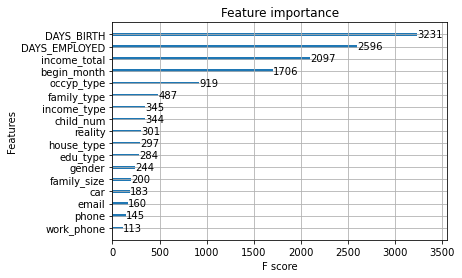

In [28]:
from xgboost import plot_importance
plot_importance(sk_clf)

In [32]:
ss.drop(['0','1','2'],1)

,index
0,26457
1,26458
2,26459
3,26460
4,26461
...,...
9995,36452
9996,36453
9997,36454
9998,36455


In [34]:
ss_sk = pd.concat([ss.drop(['0','1','2'],1),pd.DataFrame(pred_sk)],axis=1)
ss_rk = pd.concat([ss.drop(['0','1','2'],1),pd.DataFrame(pred_rk)],axis=1)

In [35]:
ss_rk.to_csv('kfold_baseline.csv',index=False)
ss_sk.to_csv('skfold_baseline.csv',index=False)

In [36]:
ss_rk

,index,0,1,2
0,26457,0.164139,0.192881,0.642980
1,26458,0.163794,0.189427,0.646779
2,26459,0.168561,0.194095,0.637344
3,26460,0.165845,0.188210,0.645945
4,26461,0.173882,0.201297,0.624821
...,...,...,...,...
9995,36452,0.162831,0.192138,0.645031
9996,36453,0.170550,0.212975,0.616475
9997,36454,0.155128,0.185603,0.659269
9998,36455,0.155454,0.192071,0.652476


In [104]:
ss['index']

0       26457
1       26458
2       26459
3       26460
4       26461
        ...  
9995    36452
9996    36453
9997    36454
9998    36455
9999    36456
Name: index, Length: 10000, dtype: int64